In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
from rotate_sw import RotateSW

Lx = Ly = 1e6
dx = dy = 5e3
steps = 300

sw = RotateSW(dx, dy, Lx, Ly)

sw.eta[1:-1,1:-1] = sw.set_gaussian(Lx/2., 0., 5e4)
ETA, U, V = sw.simulate(steps, output=1, quiver=True)
sw.print_info()

from IPython.display import HTML
anim = sw.quiver_anim(U, V, f=ETA.shape[0])
HTML(anim.to_html5_video())

100%|██████████| 300/300 [00:01<00:00, 165.04it/s]


Height:        100.0
Coriolis:      1e-05
Basin widths:  1000000.0 1000000.0
Grid spacing:  5000.0 x 5000.0
Grid size:     (202, 202)
Rossby radius: 100000.0


In [4]:
from rotate_sw import RotateSW

Lx = Ly = 1e6
dx = dy = 5e3
steps = 1000
interval = steps/200

sw = RotateSW(dx, dy, Lx, Ly)
sw.eta[1:-1,1:-1] = sw.set_gaussian(0., 0., 5e4)
ETA, _, _ = sw.simulate(steps, output=interval)
sw.print_info()

from IPython.display import HTML
anim = sw.create_anim(ETA.shape[0])
HTML(anim.to_html5_video())

100%|██████████| 1000/1000 [00:04<00:00, 217.02it/s]


Height:        100.0
Coriolis:      1e-05
Basin widths:  1000000.0 1000000.0
Grid spacing:  5000.0 x 5000.0
Grid size:     (202, 202)
Rossby radius: 100000.0


In [1]:
from rotate_sw import BetaPlaneSW

Lx = Ly = 1e6
dx = dy = 5e3
steps = 10000
interval = 1

sw = BetaPlaneSW(dx, dy, Lx, Ly)

In [1]:
from fourier import npfft, fourier_transform
import numpy as np

y = 150
x = 10
i = 1000
bplane_file = "eta_bplane_L1000000.0_d5000.0_s10000_i1_dt2500.0.npy"
friction_file = "eta_friction_L1000000.0_d5000.0_s10000_i1_dt2500.0.npy"
eta_b150 = np.load(bplane_file, mmap_mode='r')[i:, y, x]
eta_f150 = np.load(friction_file, mmap_mode='r')[i:, y, x]
eta_b50 = np.load(bplane_file, mmap_mode='r')[i:, y, 50]
eta_f50 = np.load(friction_file, mmap_mode='r')[i:, y, 50]
eta0 = np.load(bplane_file, mmap_mode='r')[0]

n, ffft150 = fourier_transform(eta_f150)
n, bfft150 = fourier_transform(eta_b150)
n, ffft50 = fourier_transform(eta_f50)
n, bfft50 = fourier_transform(eta_b50)
freq = n/(sw.dt*steps)

IOError: [Errno 2] No such file or directory: 'eta_bplane_L1000000.0_d5000.0_s10000_i1_dt2500.0.npy'

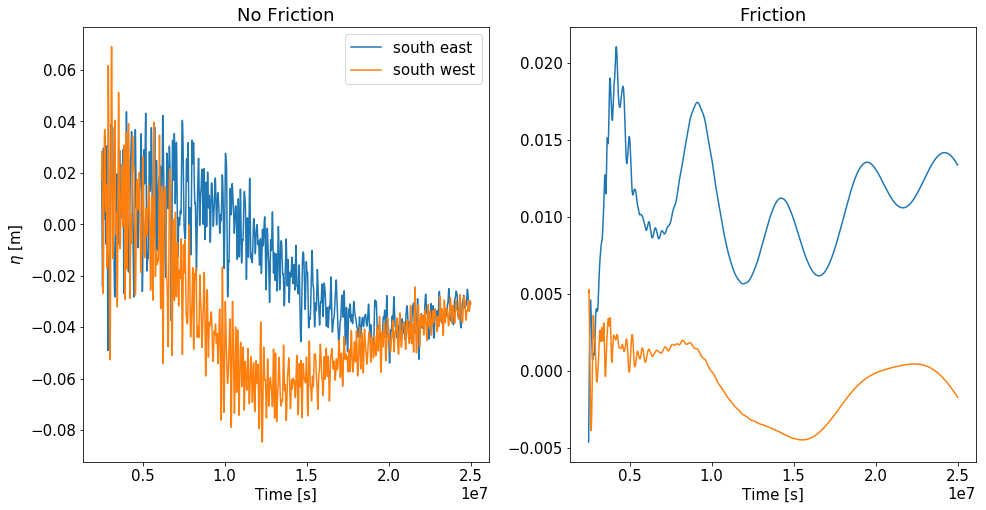

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))

size = 15
font = {'family' : 'normal',
        'size'   : size}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=size) 
matplotlib.rc('ytick', labelsize=size)

time = np.arange(0, sw.dt*steps, sw.dt)[1000:]
ax1.plot(time, eta_b150, label='south east')
ax1.plot(time, eta_b50, label='south west')
ax1.set_title('No Friction')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel(r'$\eta$ [m]')
ax1.legend()

ax2.plot(time, eta_f150)
ax2.plot(time, eta_f50)
ax2.set_title('Friction')
ax2.set_xlabel('Time [s]')
plt.show()

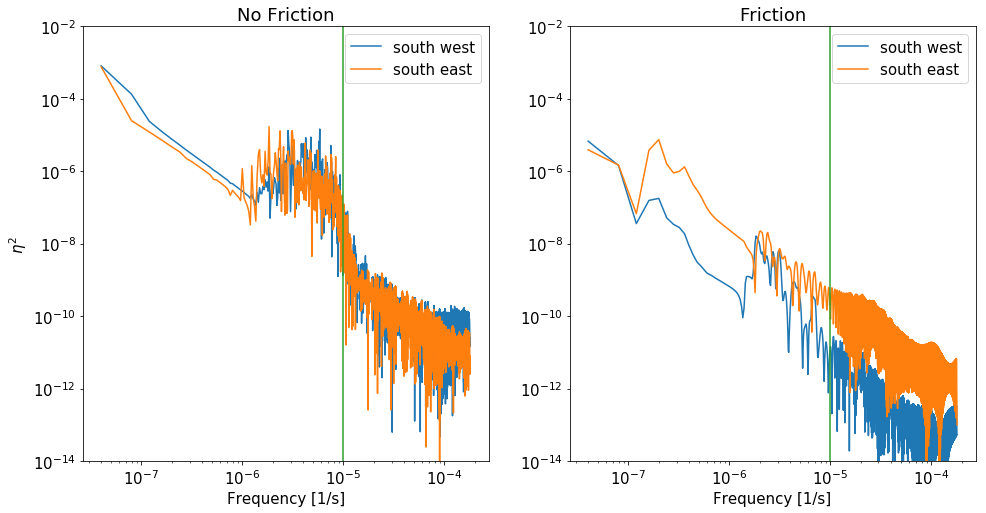

In [42]:
import matplotlib.pyplot as plt
import matplotlib
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))

size = 15
font = {'family' : 'normal',
        'size'   : size}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=size) 
matplotlib.rc('ytick', labelsize=size) 
# matplotlib.rc('title', labelsize=size) 

ax1.plot(freq*2*np.pi, bfft50, label='south west')
ax1.plot(freq, bfft150, label='south east')
ax1.plot([sw.f0, sw.f0], [1e-14, 1e-2])
ax1.set_ylim(1e-14, 1e-2)
ax1.set_xlabel('Frequency [1/s]')
ax1.set_title('No Friction')
ax1.set_ylabel(r'$\eta^2$')
ax1.loglog()
ax1.legend()

ax2.plot(freq, ffft50, label='south west')
ax2.plot(freq, ffft150, label='south east')
ax2.plot([sw.f0, sw.f0], [1e-14, 1e-2])
ax2.set_xlabel("Frequency [1/s]")
ax2.set_title('Friction')
ax2.set_ylim(1e-14, 1e-2)
ax2.loglog()
ax2.legend()
plt.savefig('test.png')
plt.show()

# Rossby Wave Speed

$R = 100$ km ;   $\beta = 10^{-11}$ 1/s

for long Rossby waves:  $c = \frac{\partial \omega}{\partial k_1} = \beta R_N^2 = 10$ cm/s

Rossby wave length $\lambda \approx 1000$ km

Rossby wave frequency $\omega = \frac{\beta k}{k^2 R^{-2}} = 10^{-7}$ 1/s

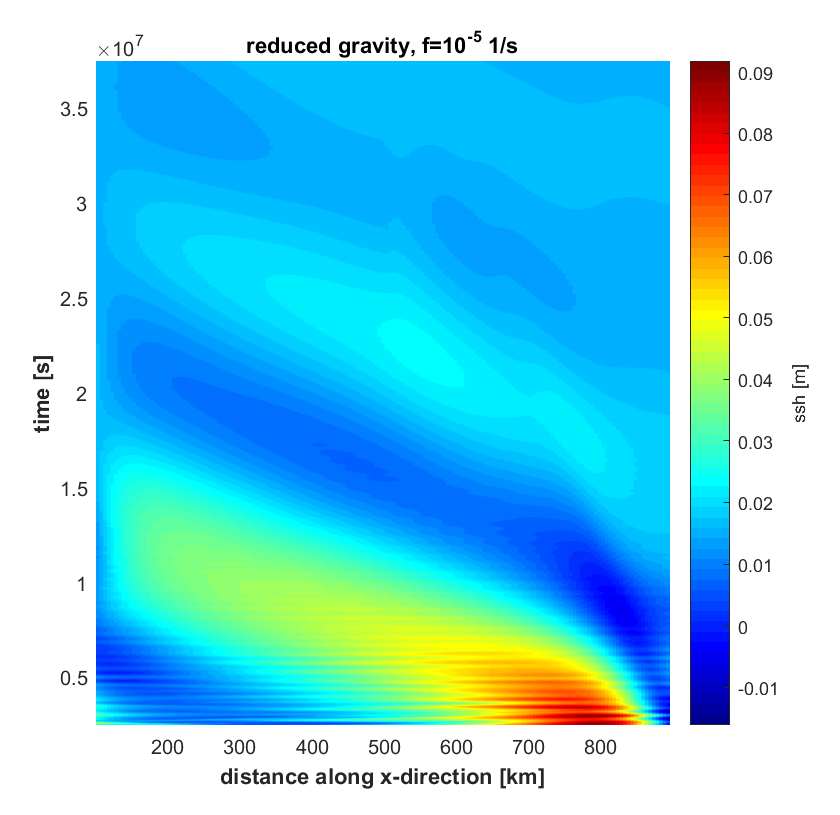

In [10]:
from IPython.display import Image
Image("hovm_rossby_wave.png")

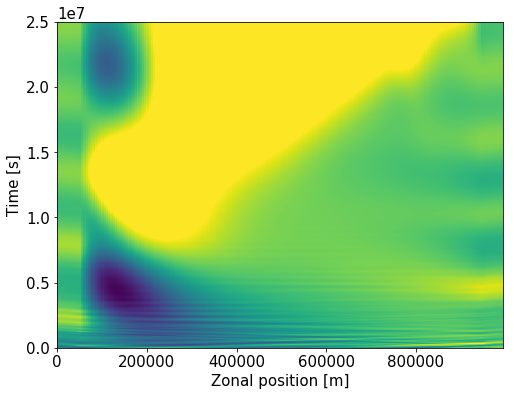

In [12]:
eta = np.load(friction_file, mmap_mode='r')[:, 100, :]

start = 1000
herman = eta[start:].copy()
v = 0.02

x = sw.x[0]; t = np.linspace(start, (herman.shape[0]+start)*sw.dt, herman.shape[0])
x, t = np.meshgrid(x, t)
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(x, t, herman, vmin=-v, vmax=v)
plt.xlabel("Zonal position [m]")
plt.ylabel("Time [s]")
plt.show()